# Explore here

In [1]:
# Your code here
#python3 -m pip install ipykernel -U --user --force-reinstall

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"

# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Cargar la base de datos
total_data = pd.read_csv(url)
print(total_data.head())

# Save the DataFrame to a local CSV file in the '../data/raw/' directory
total_data.to_csv('../data/raw/demographic_health_data.csv', index=False)
print(f'File saved at: ../data/raw/demographic_health_data.csv')


   fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  40-49  40-49 y/o % of total pop  50-59  \
0                 12.749771   7582                 13.636445   7738   
1                 11.564429  27338                 12.539102  29986   
2    

In [2]:
# Obtener las dimensiones
total_data.shape

(3140, 108)

In [10]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(47)
memory usage: 2.6 MB


In [12]:
# Listar columnas numéricas y categóricas
categorical_cols = total_data.select_dtypes(include=['object']).columns
numeric_cols = total_data.select_dtypes(include=['number']).columns

print("Columnas categóricas:", categorical_cols)
print("Columnas numéricas:", numeric_cols)


Columnas categóricas: Index([], dtype='object')
Columnas numéricas: Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)


Todas las columnas de tu DataFrame son de tipo numérico (int64 o float64). Dado

In [19]:
# Crear un diccionario para almacenar las columnas duplicadas
duplicate_columns = {}

# Comparar cada par de columnas
for i in range(total_data.shape[1]):
    col1 = total_data.iloc[:, i]
    for j in range(i + 1, total_data.shape[1]):
        col2 = total_data.iloc[:, j]
        if col1.equals(col2):
            duplicate_columns[total_data.columns[i]] = total_data.columns[j]

# Mostrar las columnas duplicadas
for key, value in duplicate_columns.items():
    print(f'Columna {key} es duplicada de {value}')


Ahora se han identificado las columnas duplicadas, se puede proceder a eliminarlas para simplificar el análisis de datos.

In [20]:
# Eliminar las columnas duplicadas
total_data = total_data.drop(columns=['POP_ESTIMATE_2018', 'Median_Household_Income_2018'])

# Verificar que se han eliminado
total_data.shape

KeyError: "['POP_ESTIMATE_2018', 'Median_Household_Income_2018'] not found in axis"

In [24]:
# Identificar las columnas con valores faltantes y el número de valores faltantes en cada columna
missing_values = total_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]

# Mostrar las columnas con valores faltantes y el número de valores faltantes en cada columna
print(missing_columns)


Series([], dtype: int64)


No hay valores faltantes

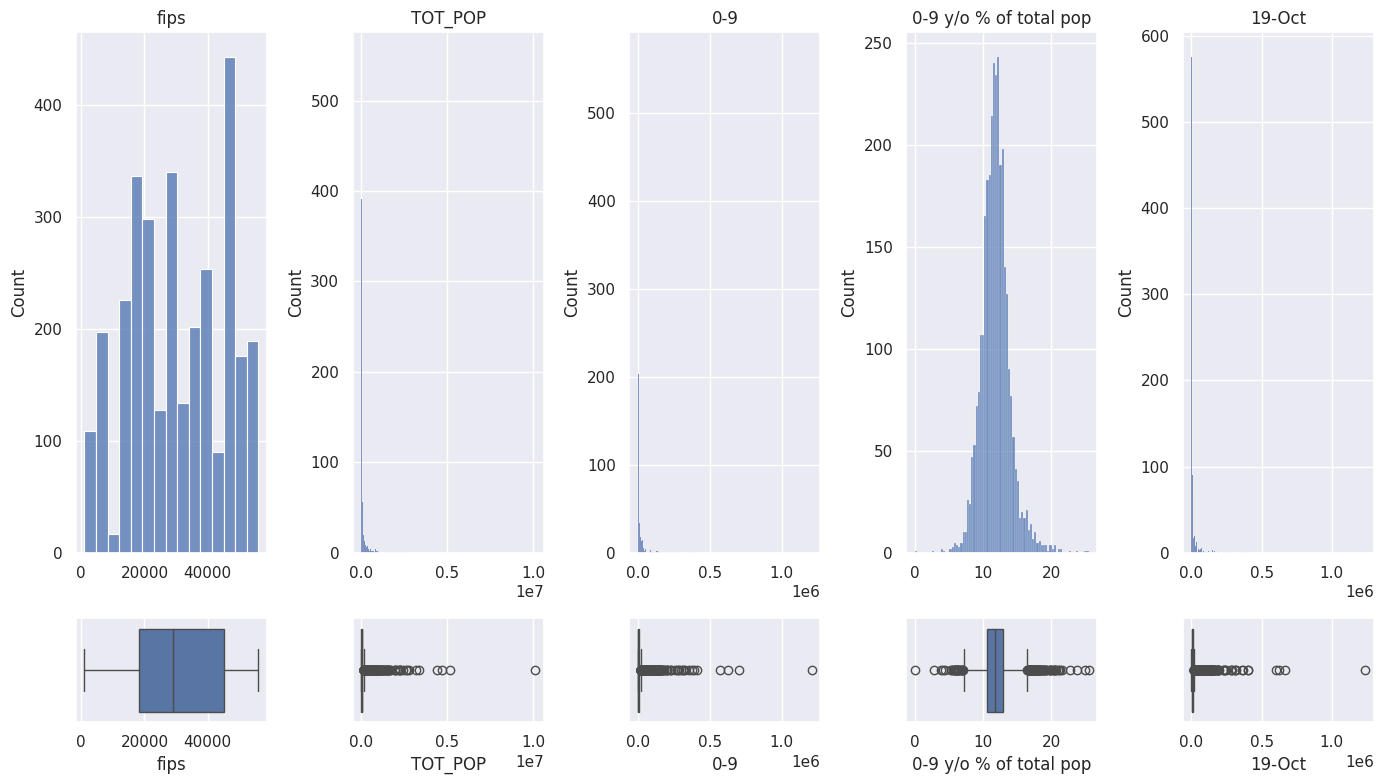

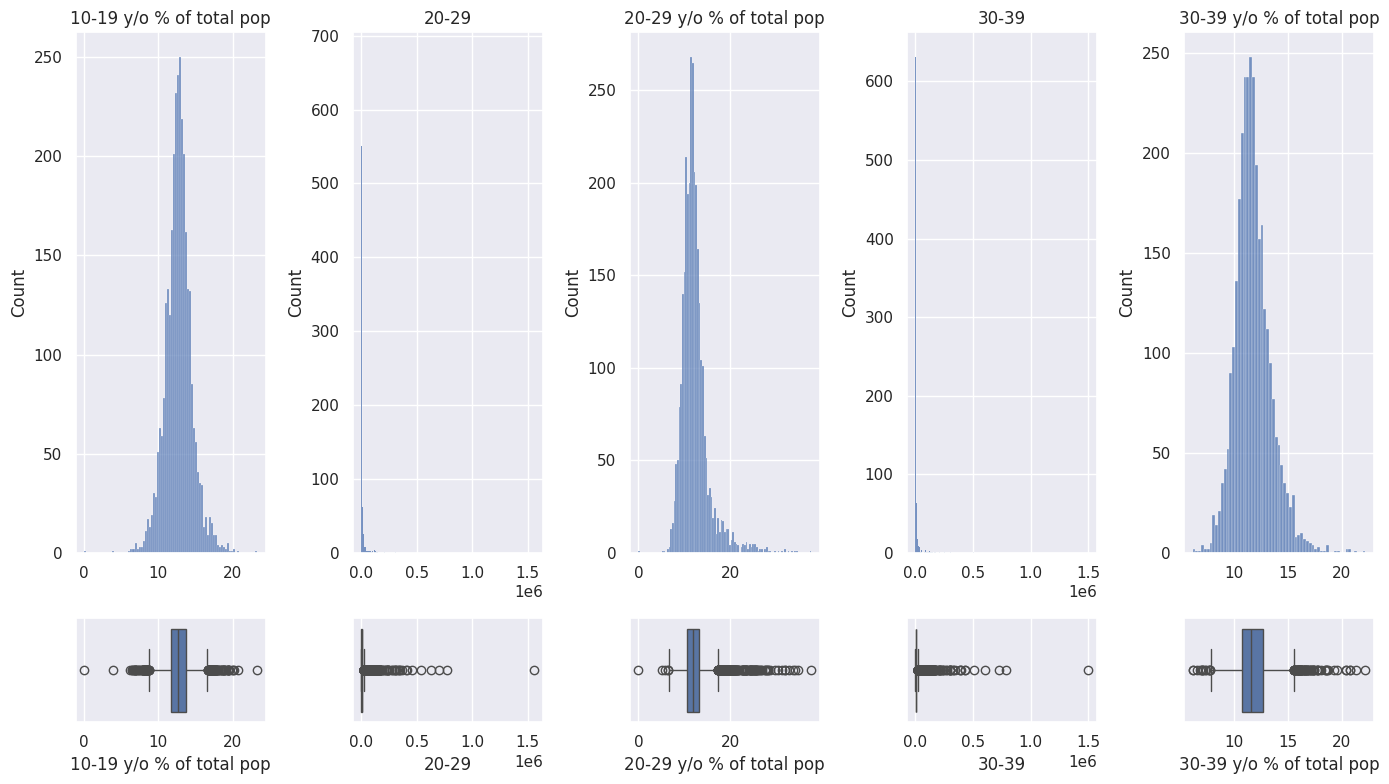

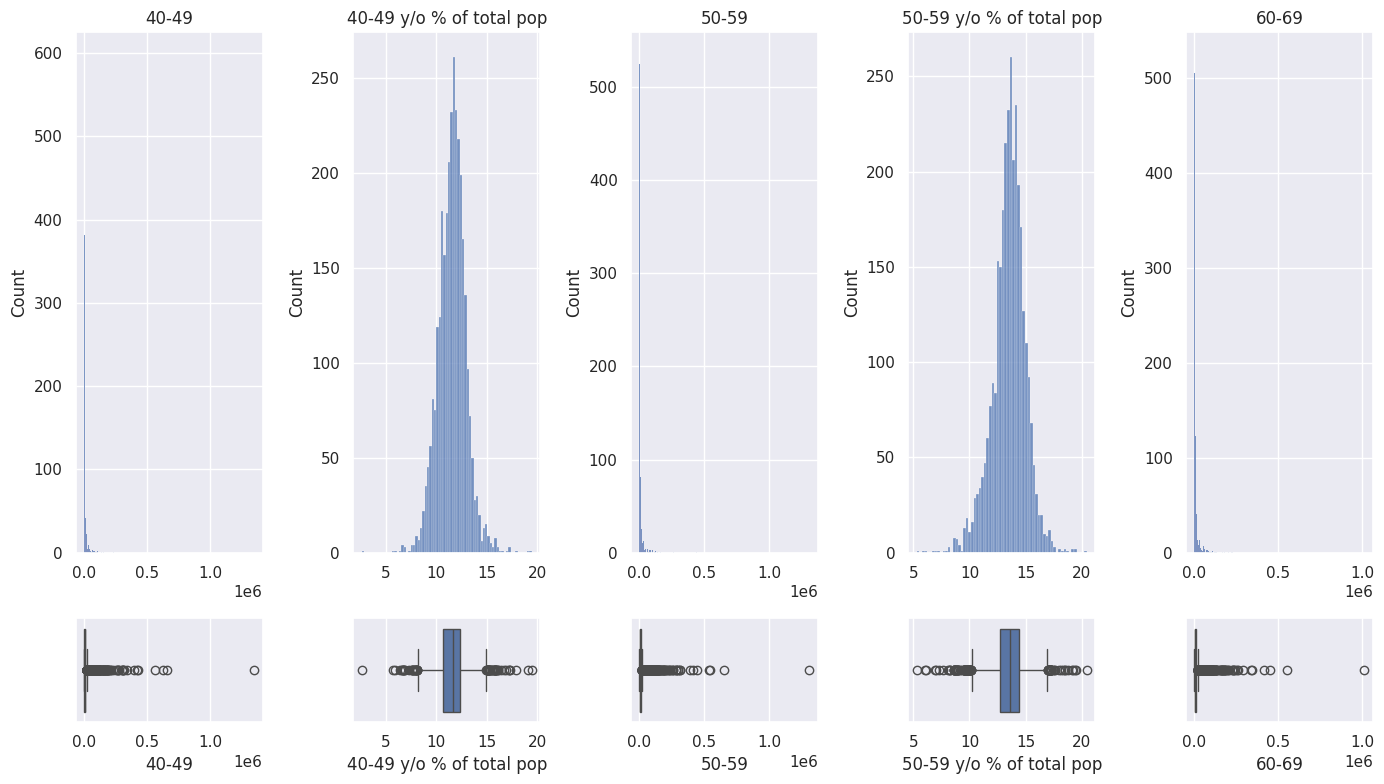

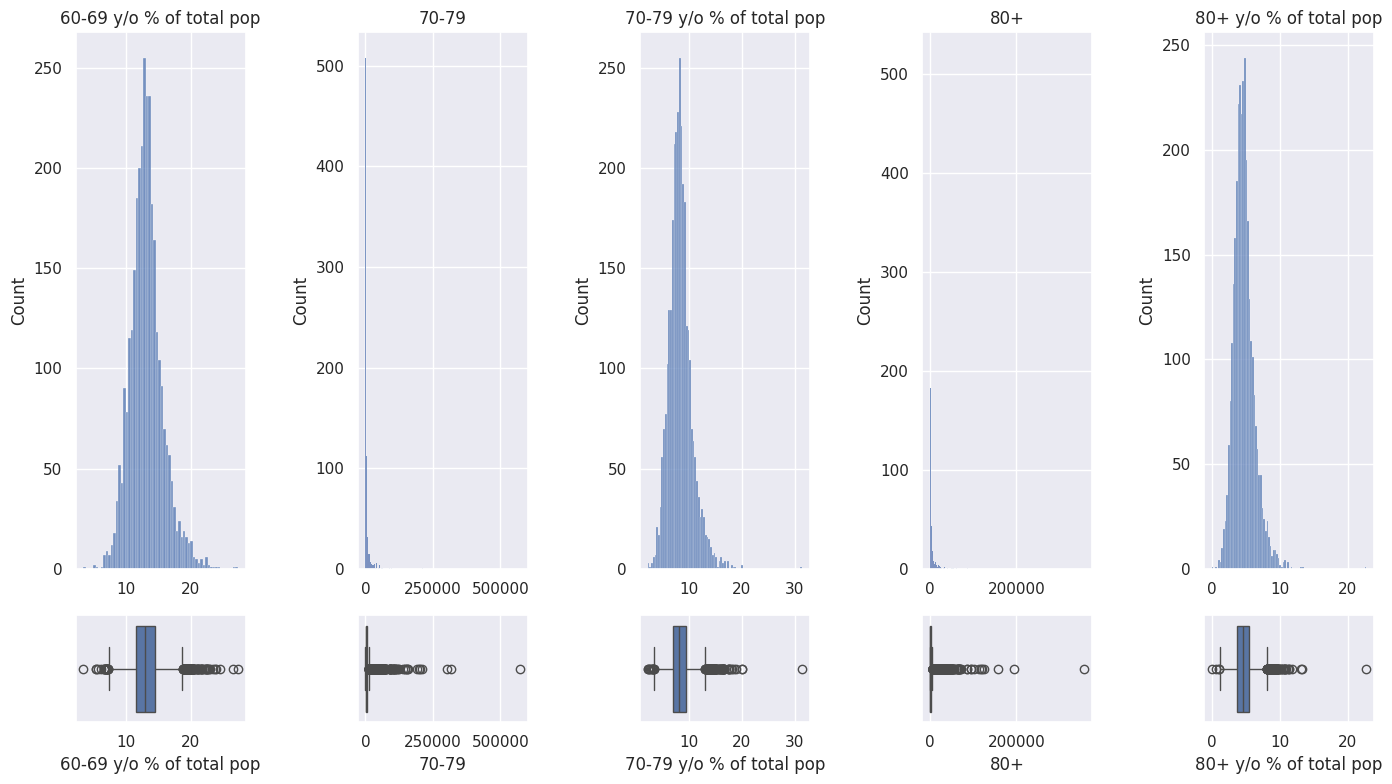

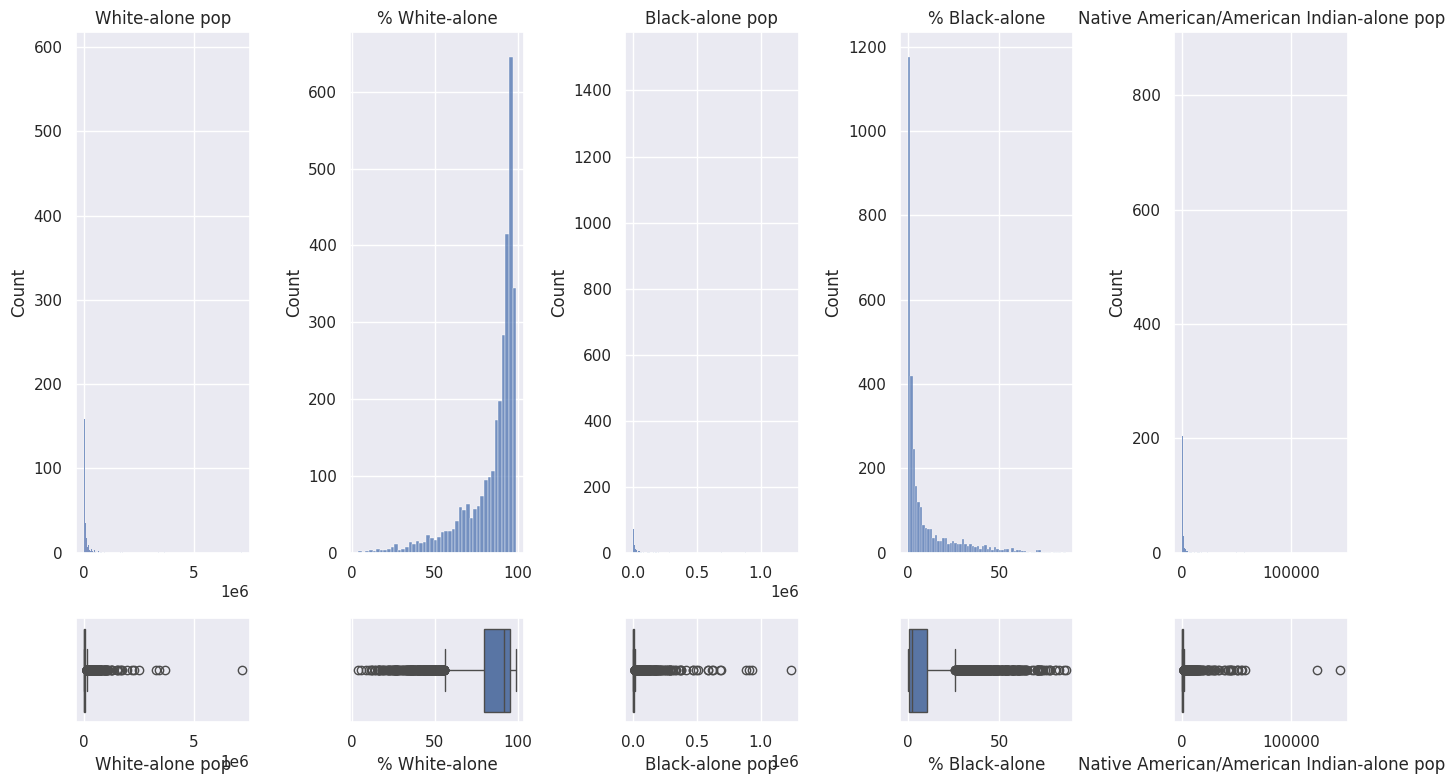

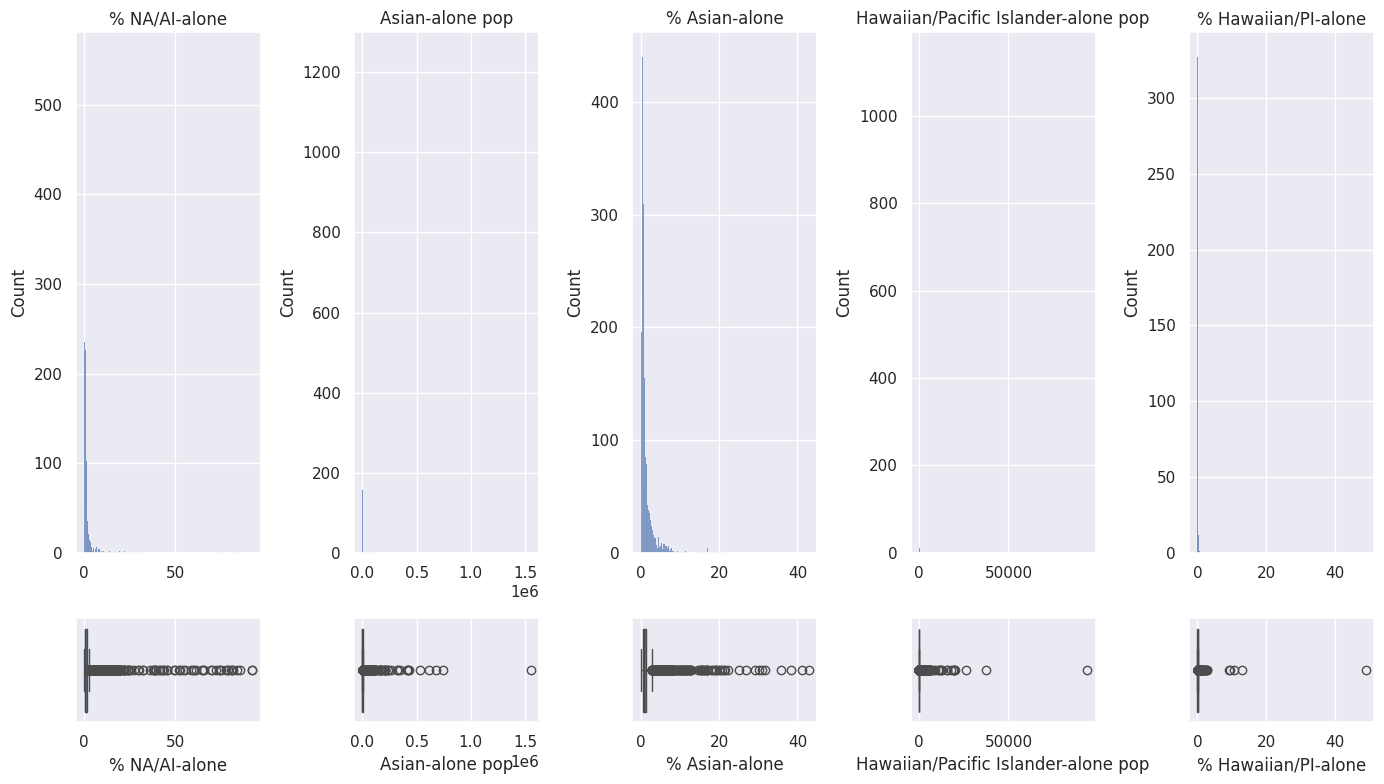

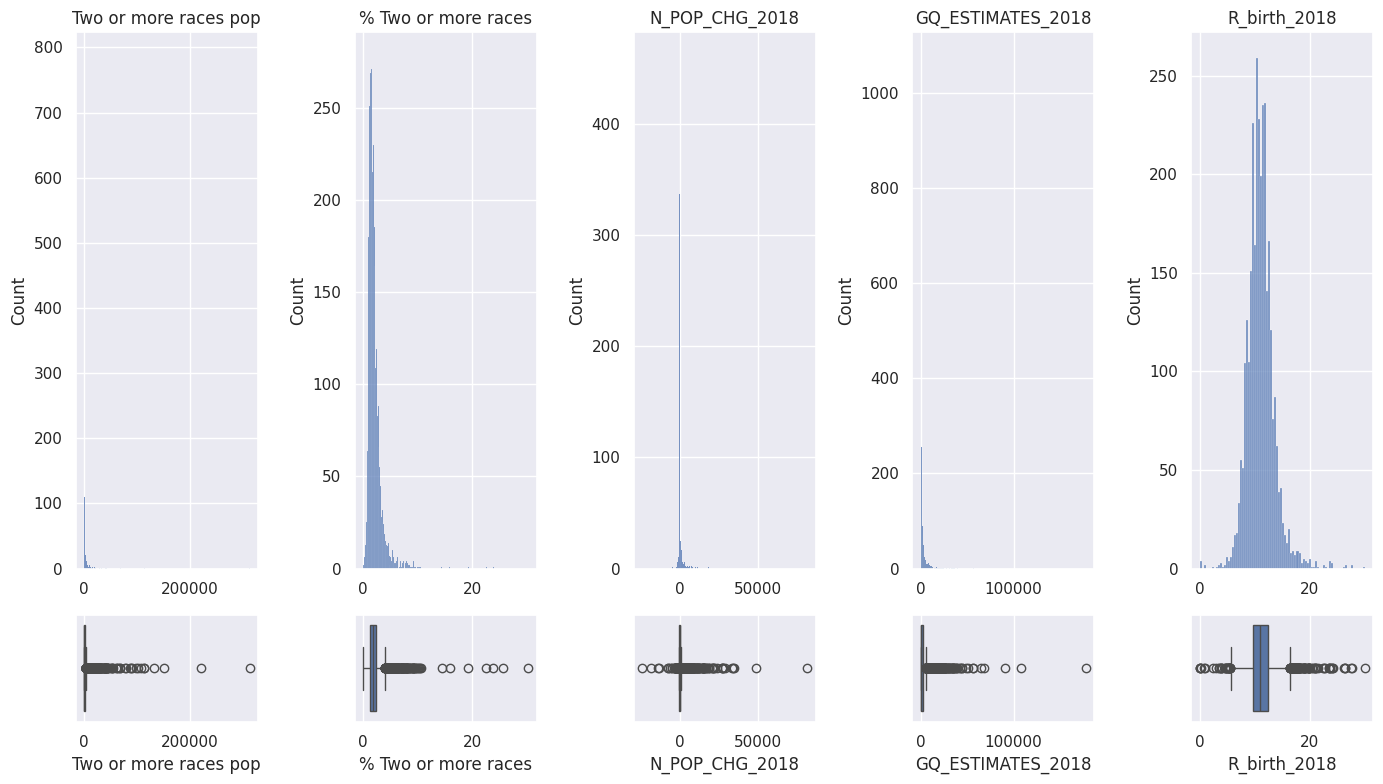

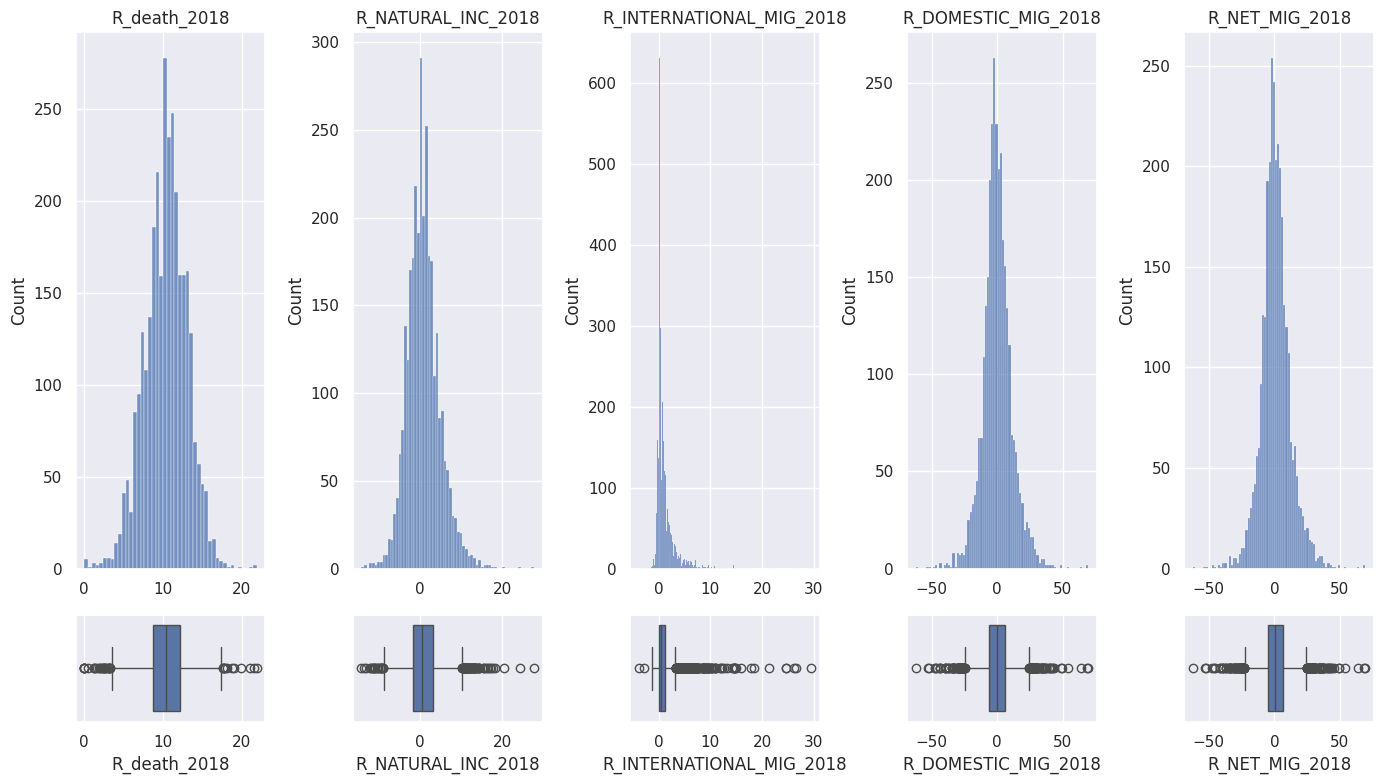

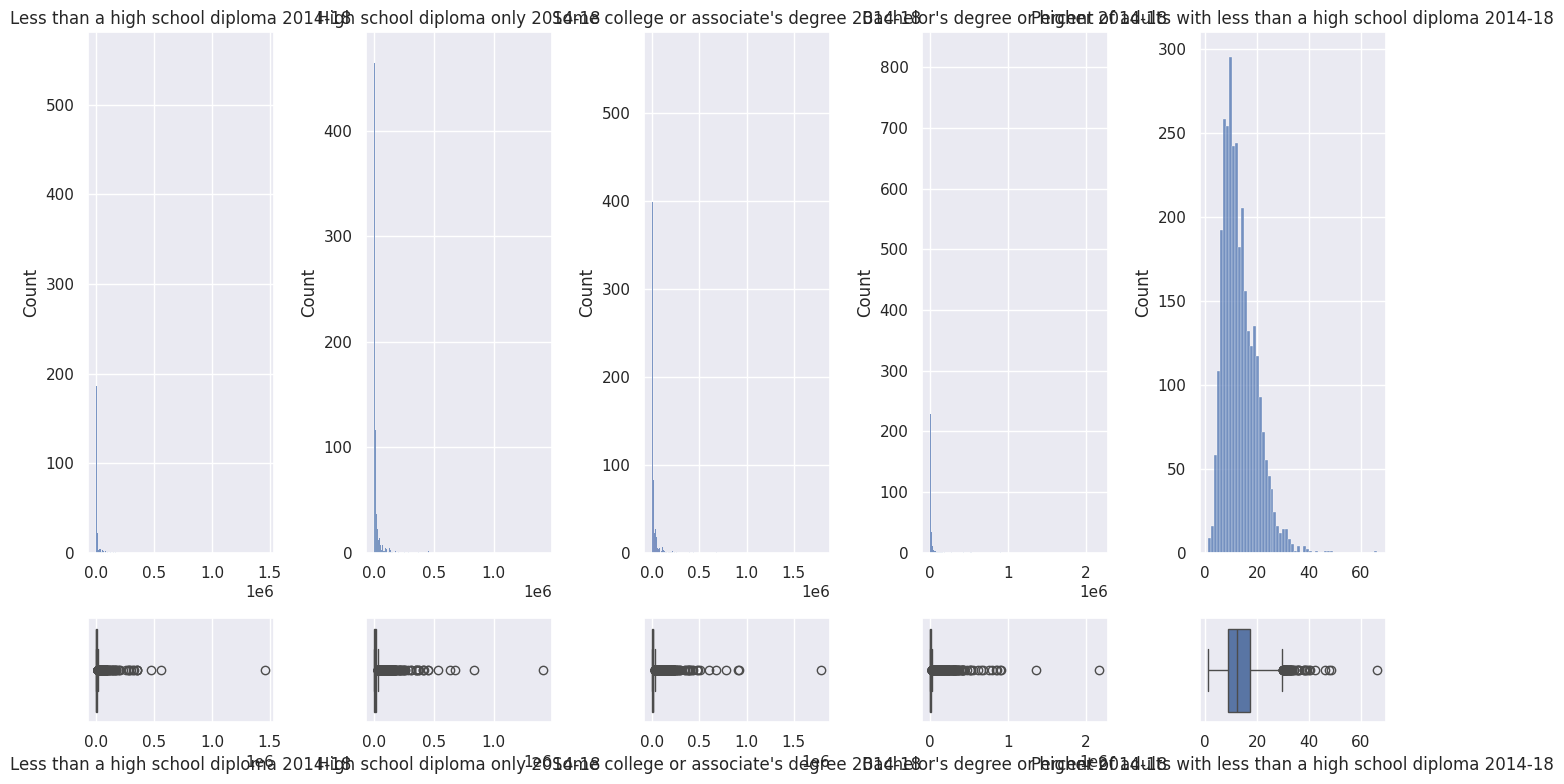

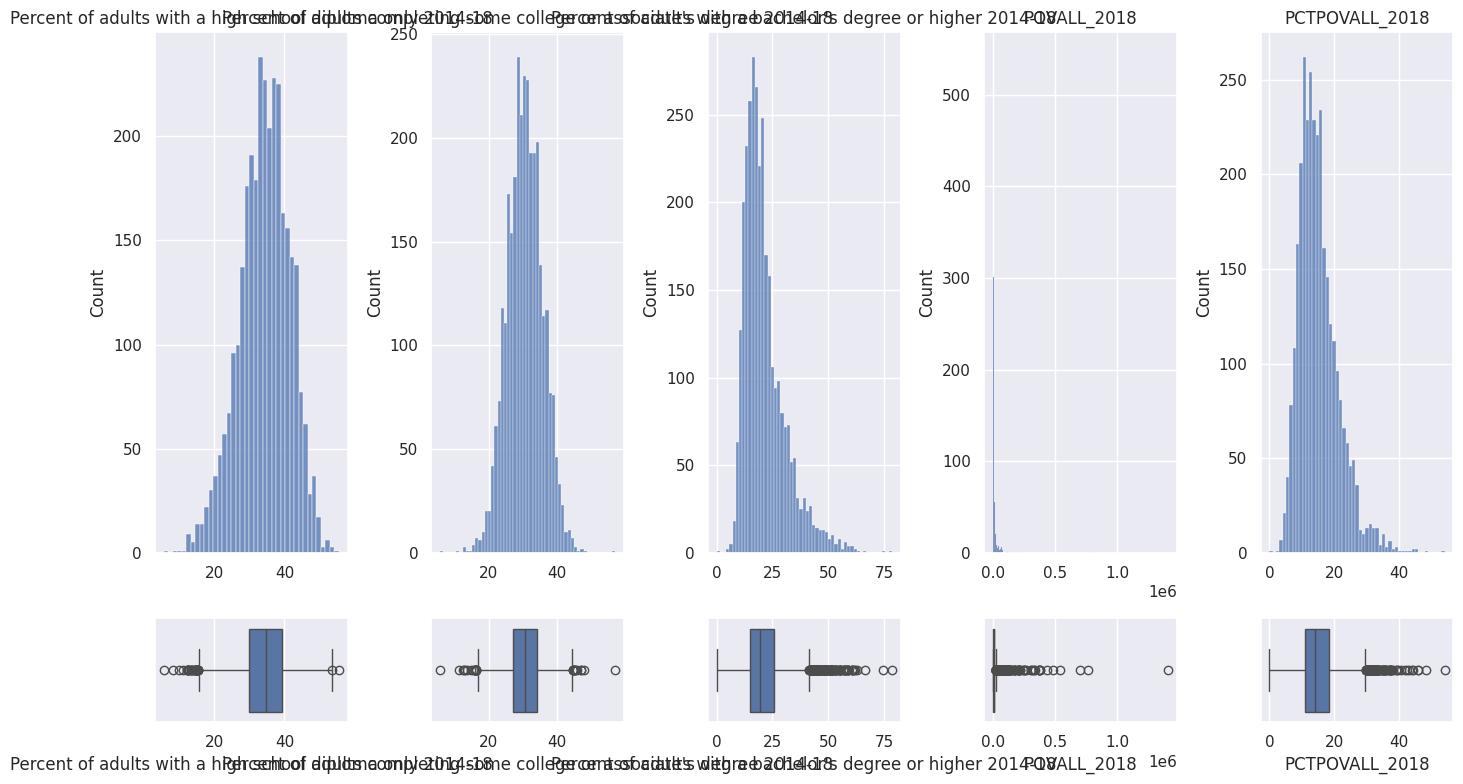

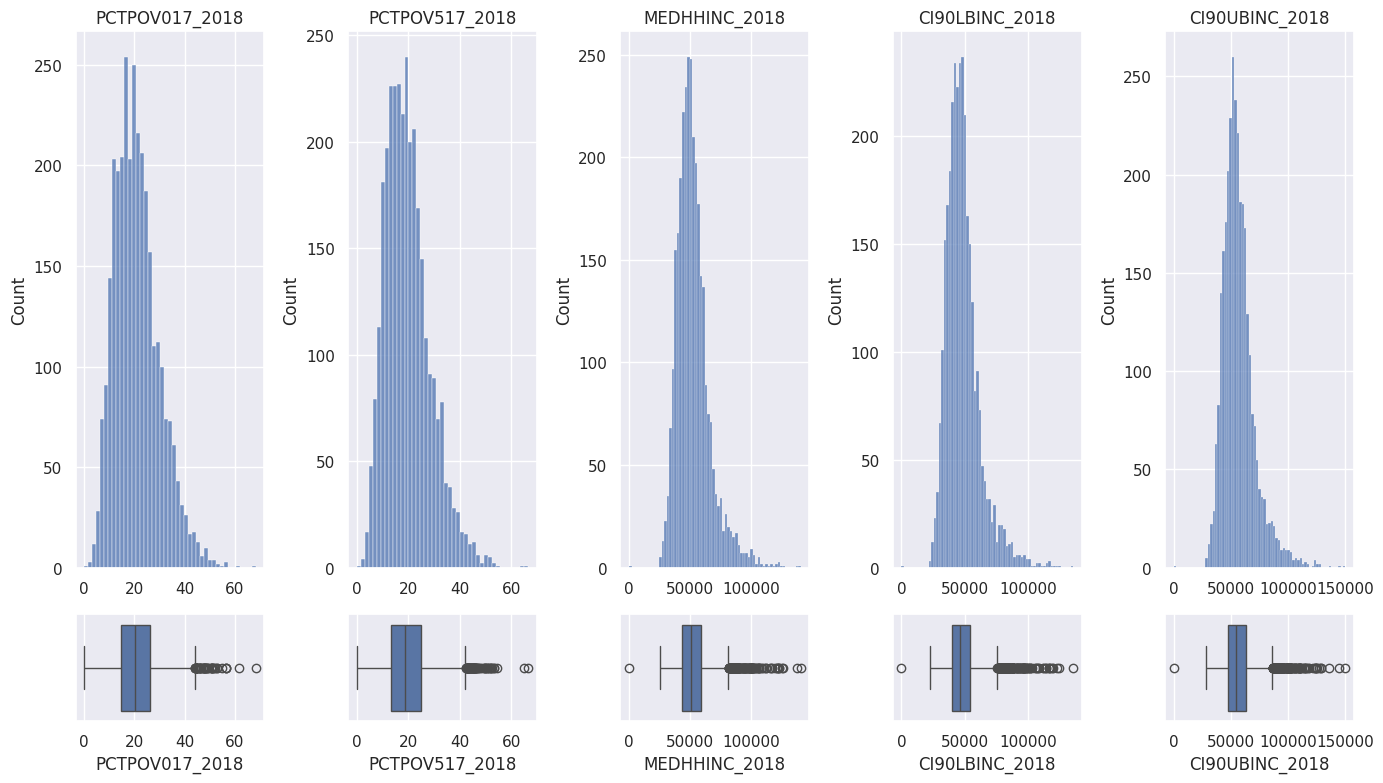

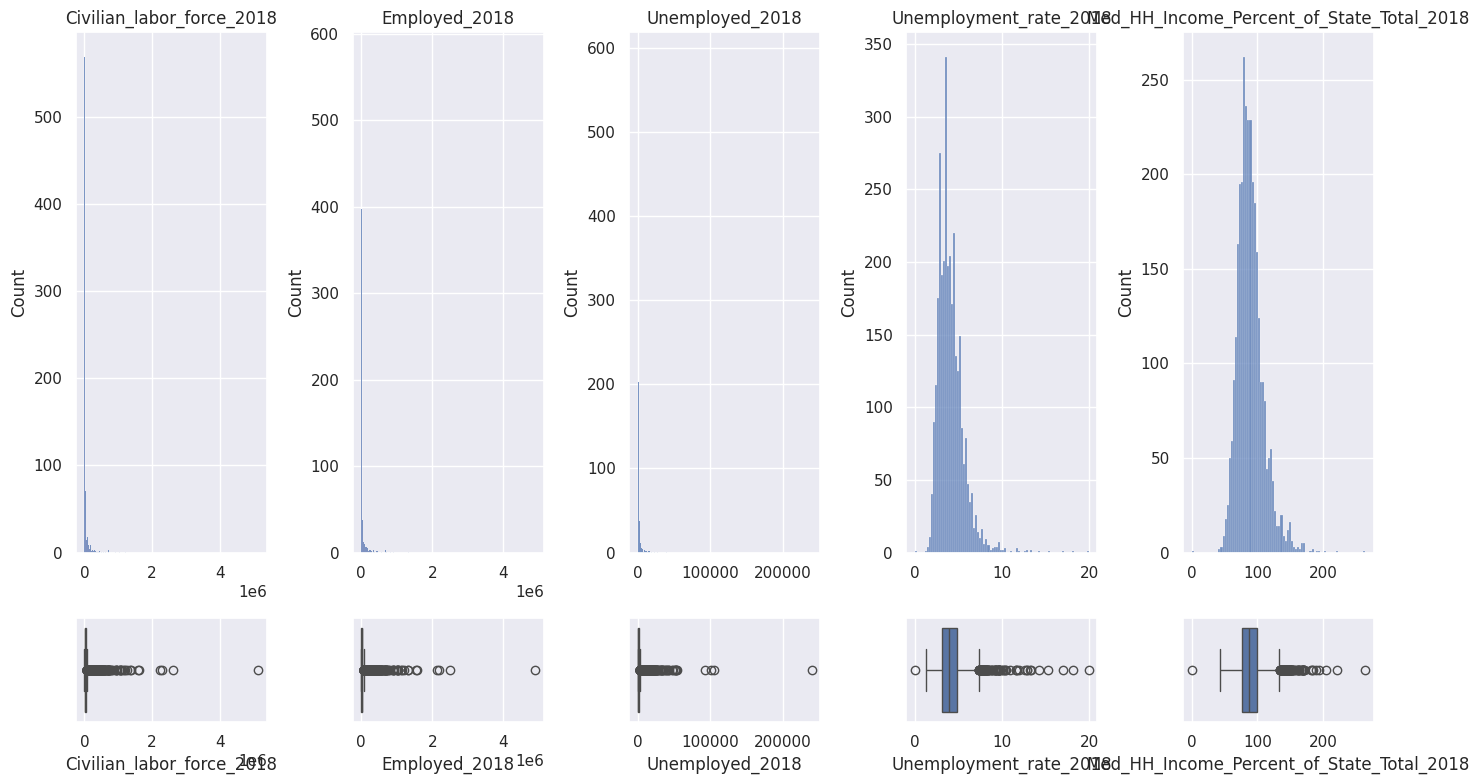

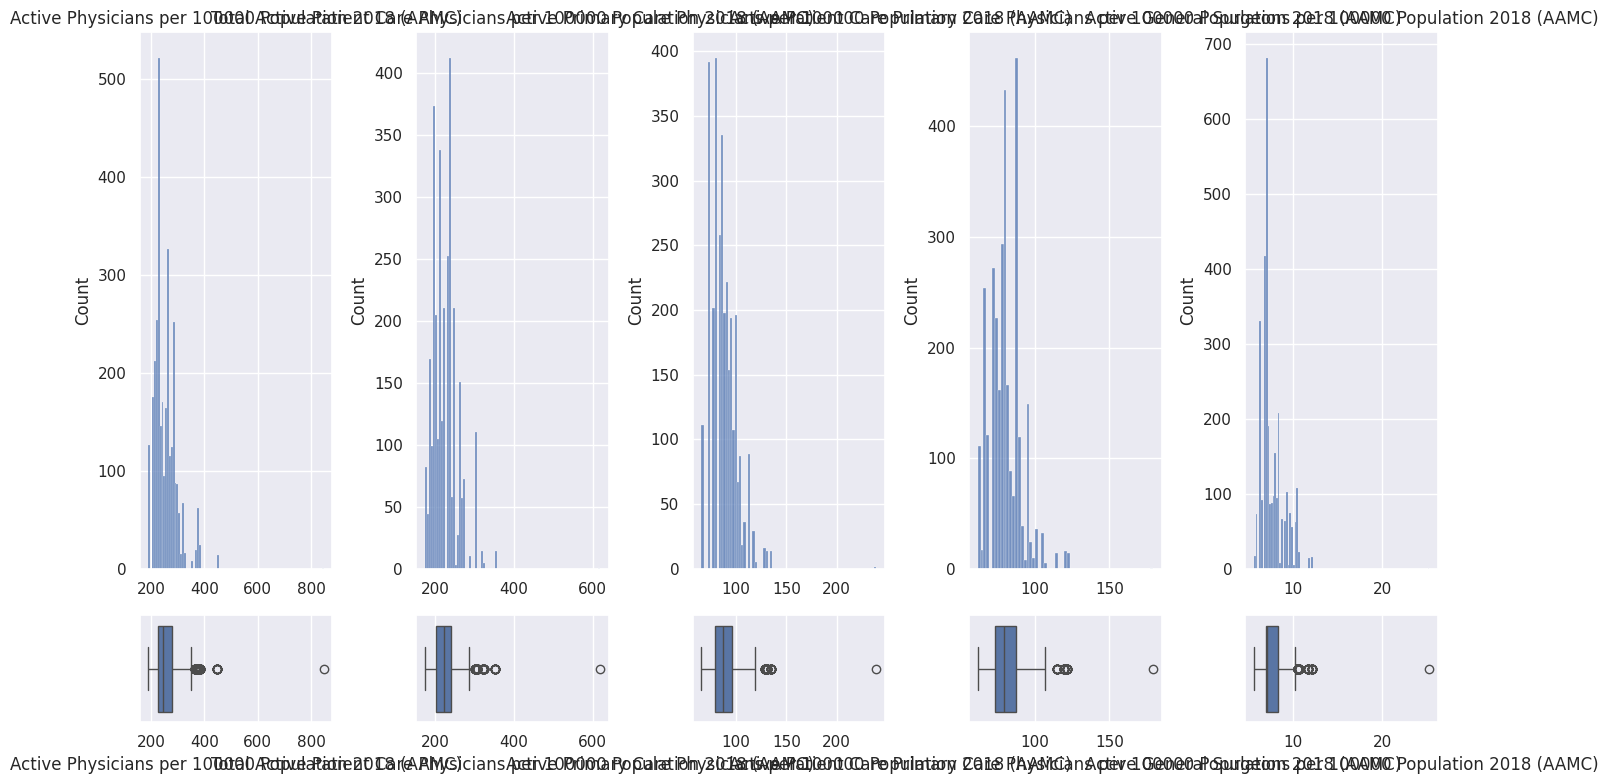

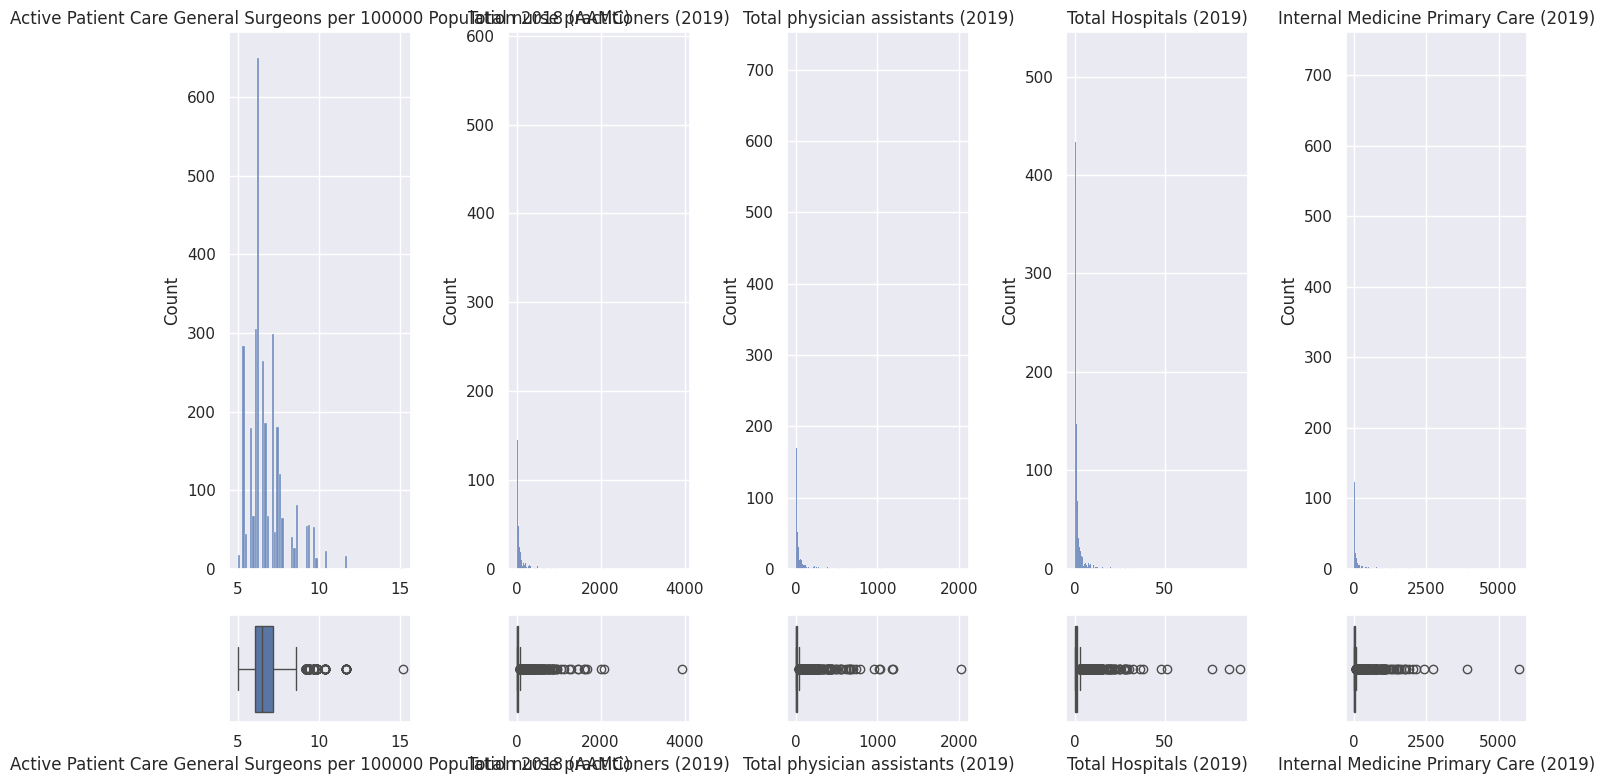

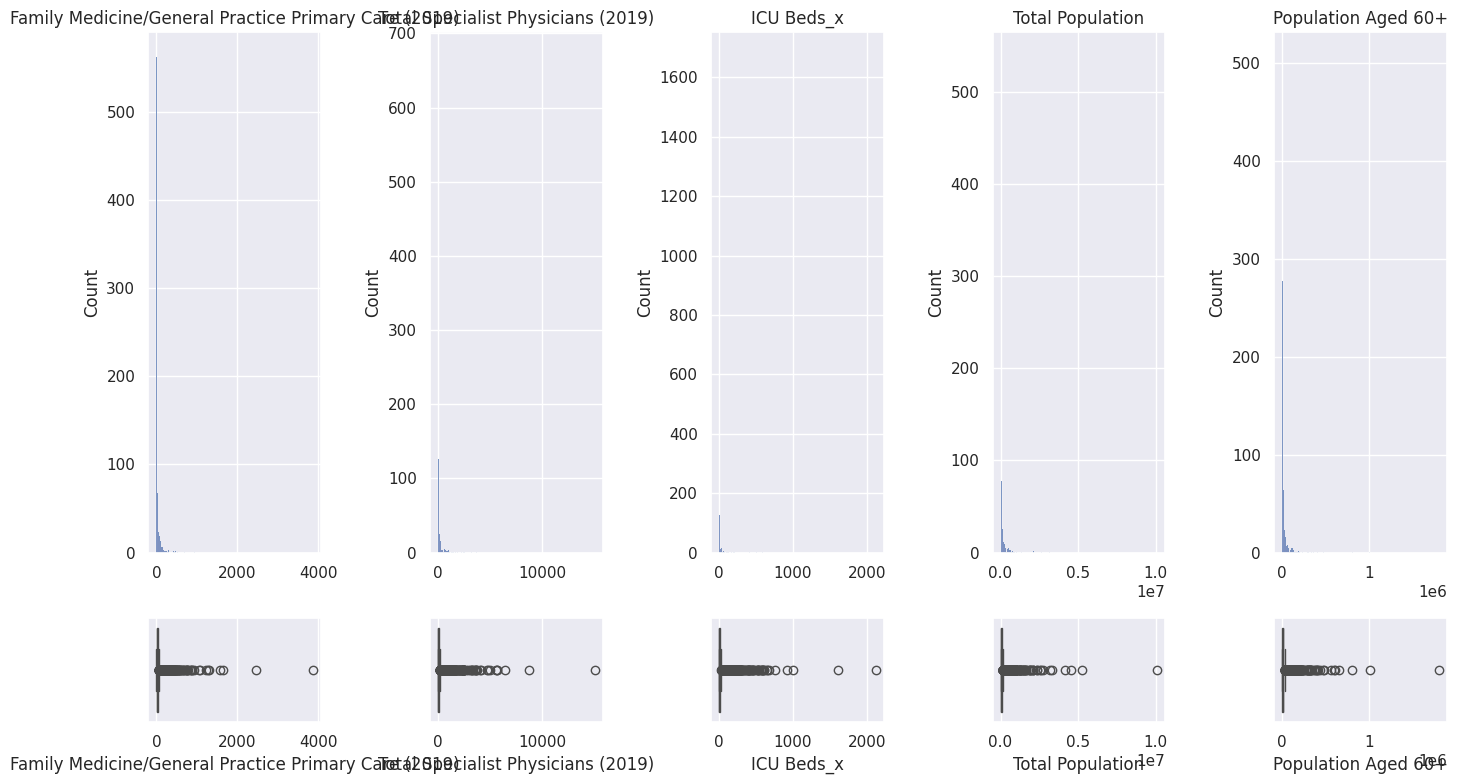

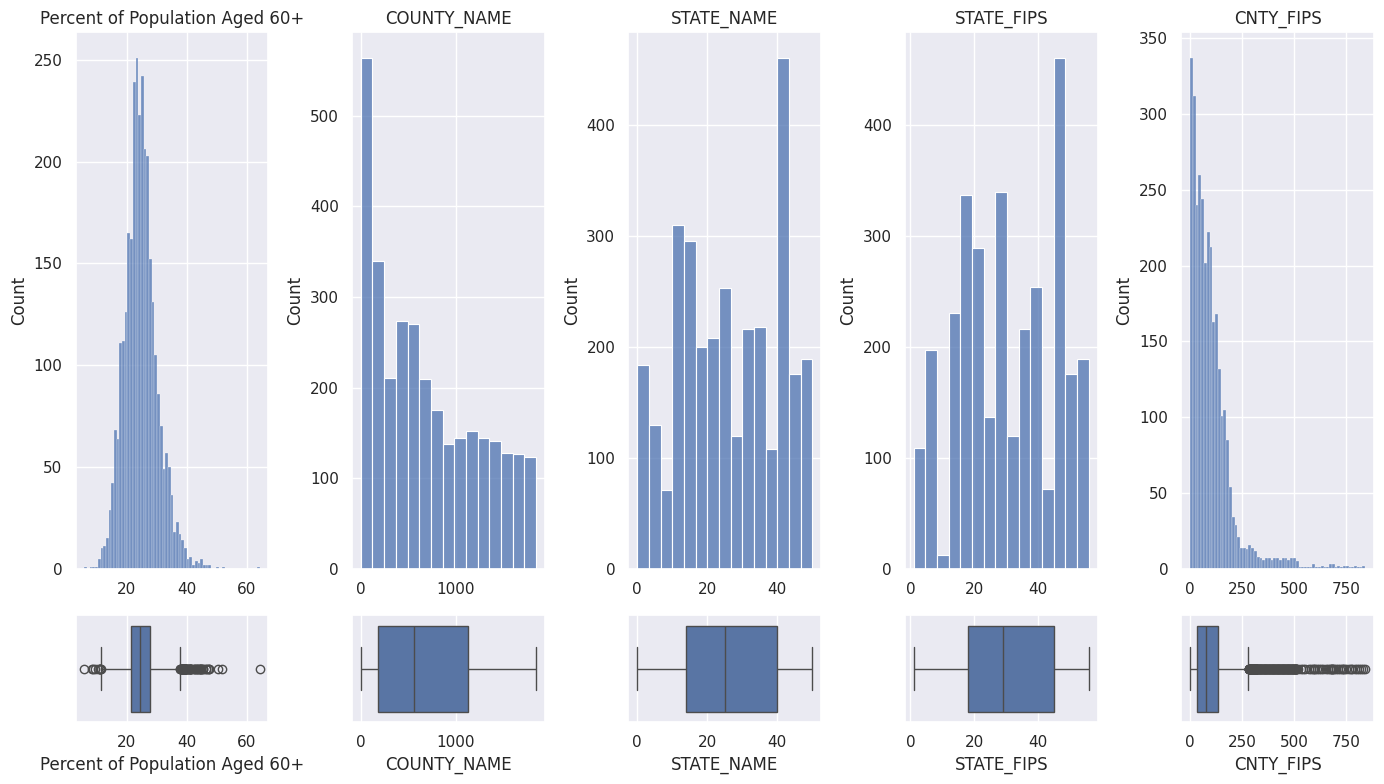

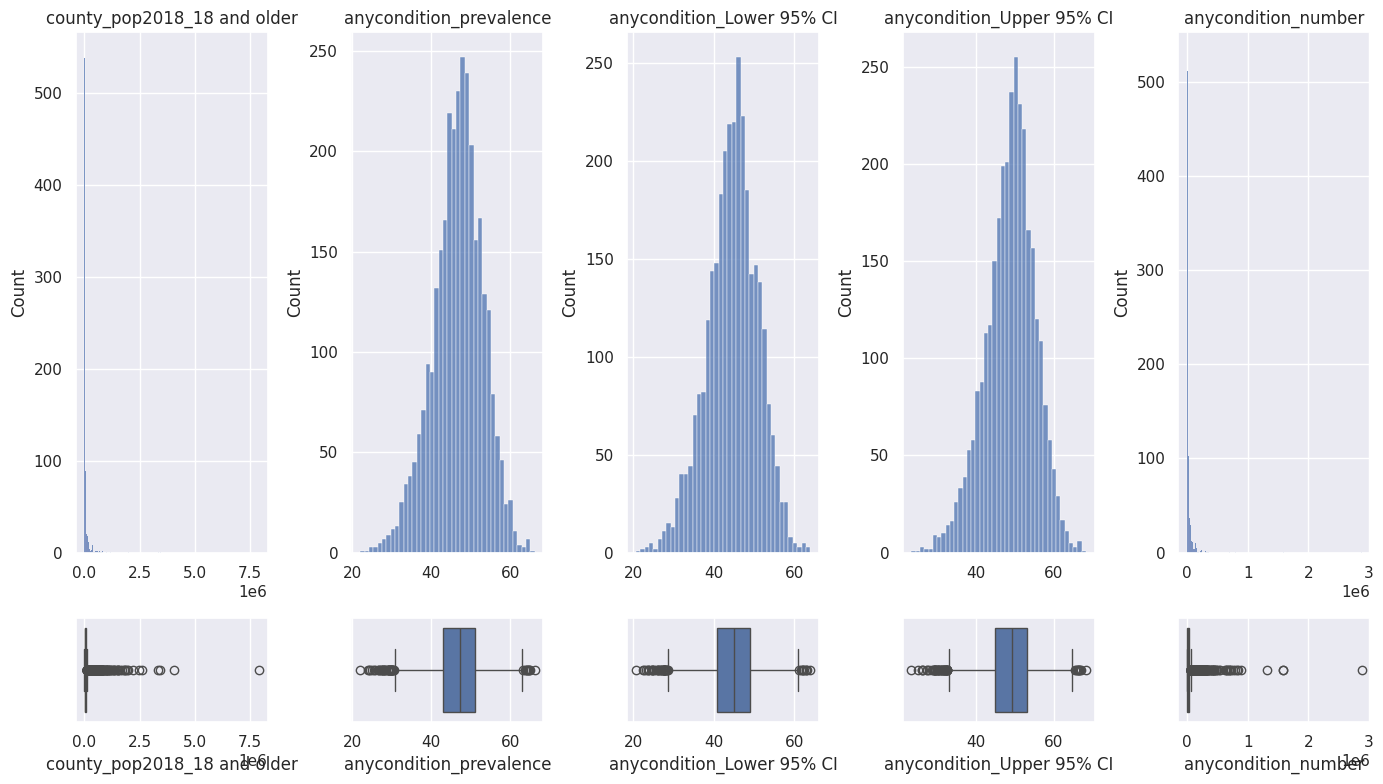

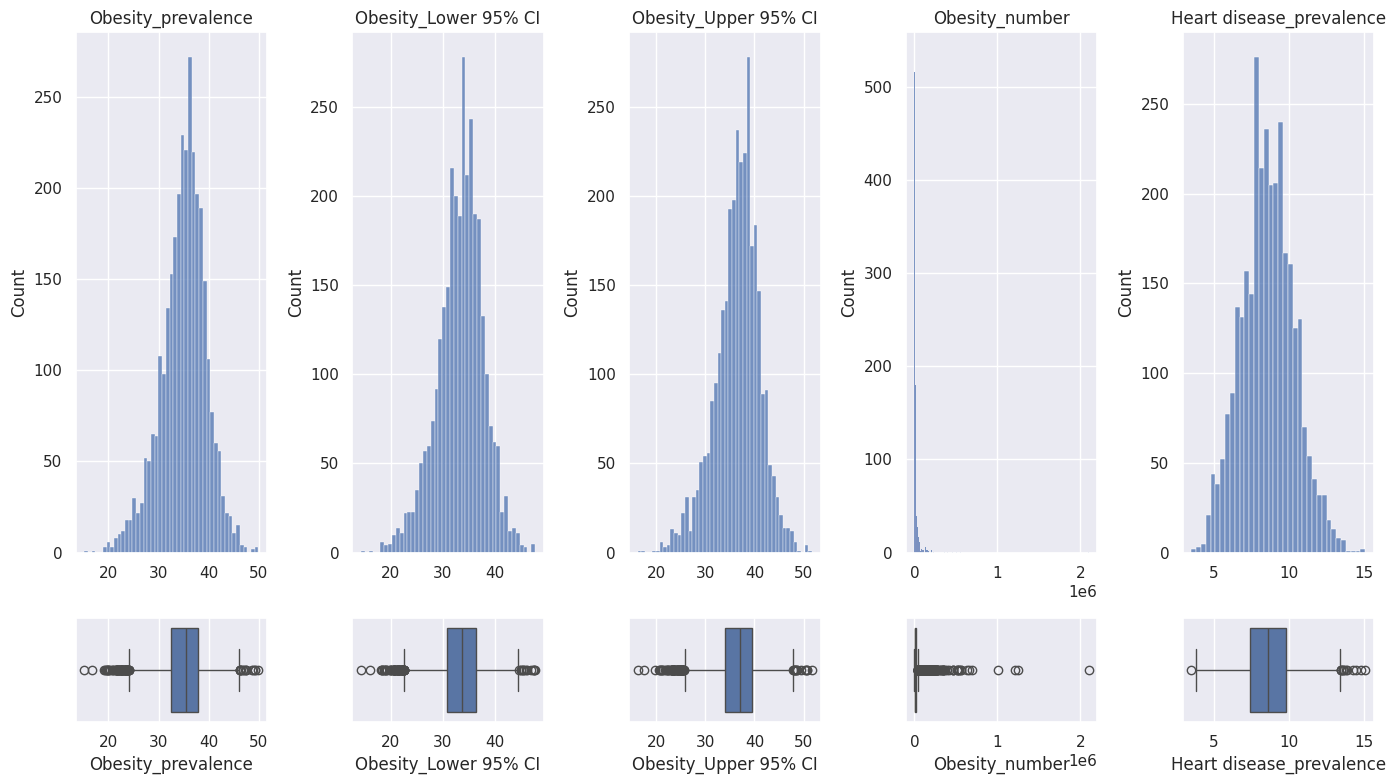

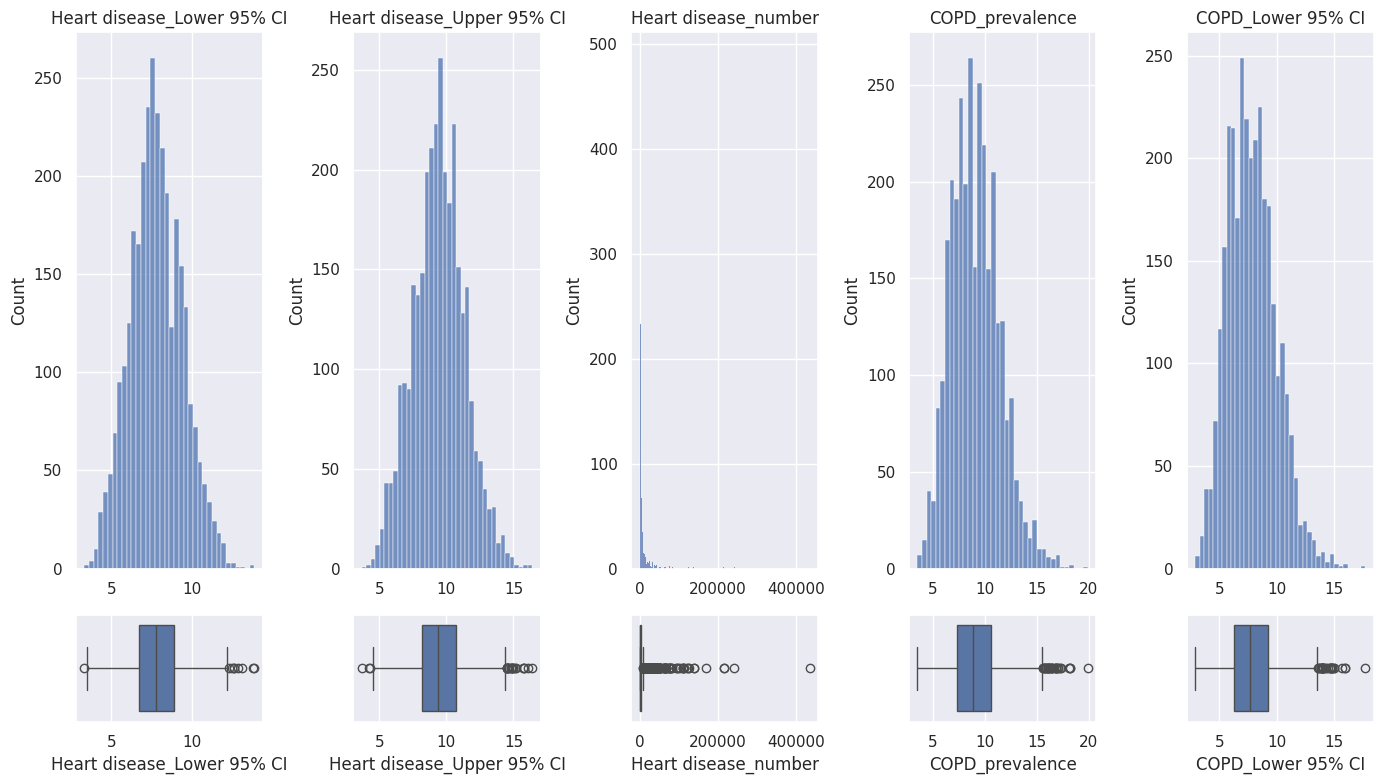

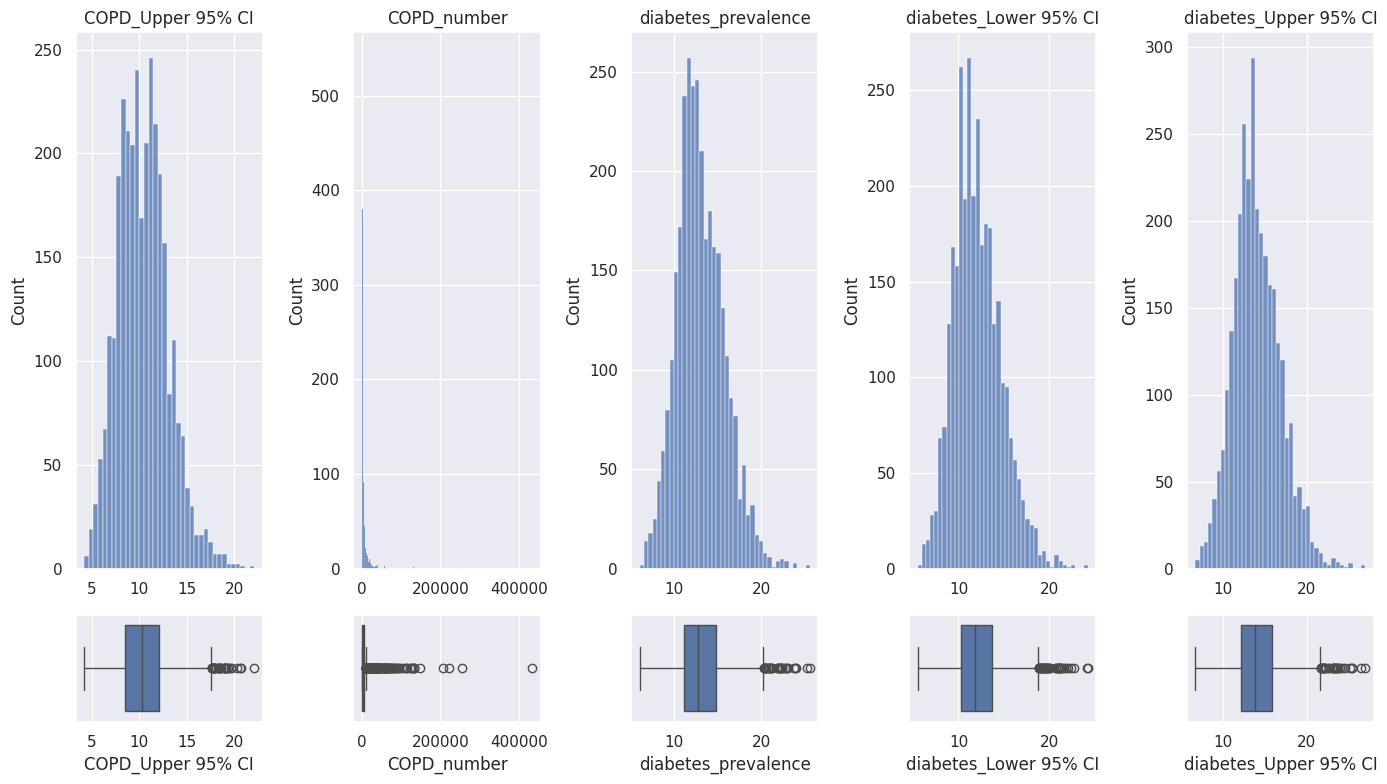

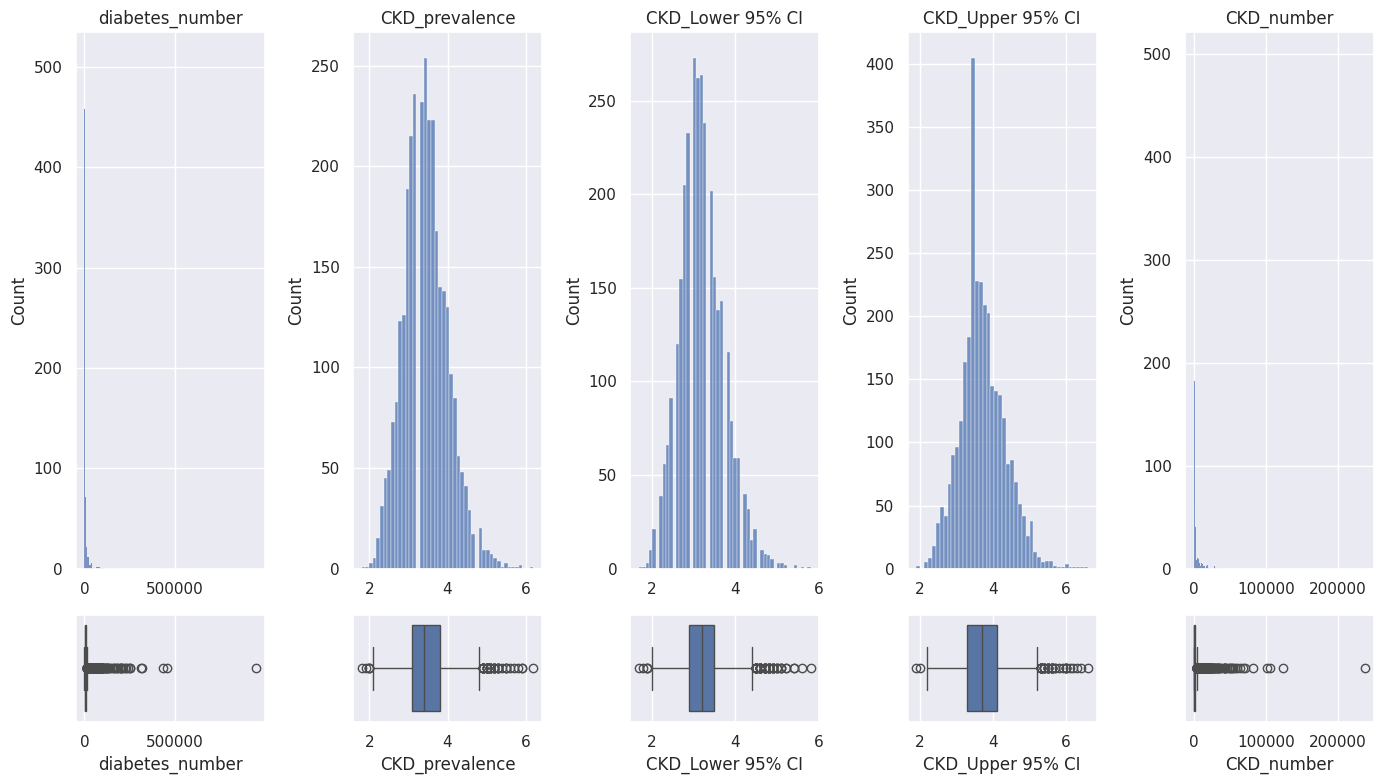

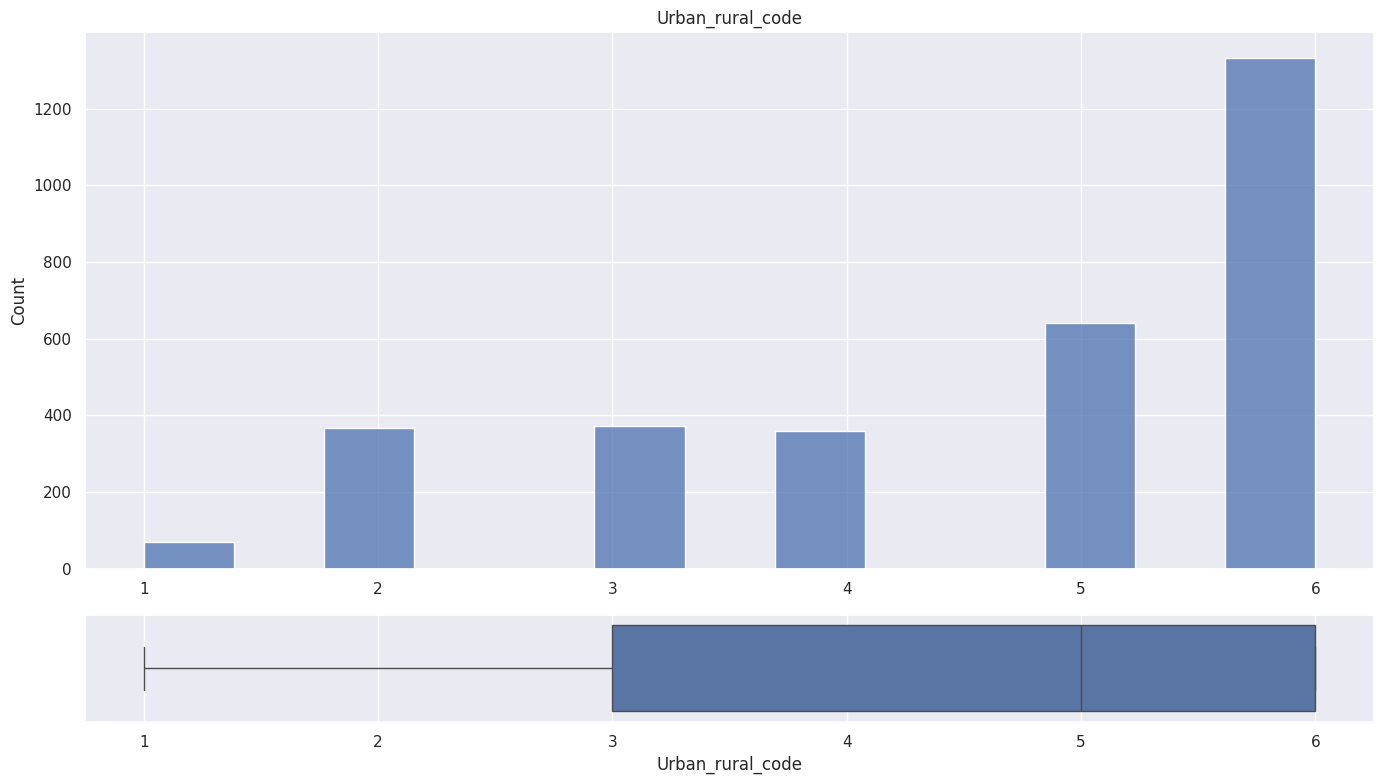

In [27]:
# Filtrar solo las columnas numéricas
numeric_cols = total_data.select_dtypes(include=['number'])

# Obtener los nombres de las columnas del DataFrame
column_names = numeric_cols.columns

# Establecer configuración de Seaborn
sns.set()

# Definir el número de columnas por grupo
num_cols_per_group = 5  # Para tener 5 gráficos por fila

for start in range(0, len(column_names), num_cols_per_group):
    end = min(start + num_cols_per_group, len(column_names))
    sub_columns = column_names[start:end]
    
    # Crear una figura con múltiples subplots
    fig, axes = plt.subplots(2, len(sub_columns), figsize=(14, 8),
                             gridspec_kw={'height_ratios': [5, 1]})

    # Asegurarse de que 'axes' es siempre una matriz bidimensional
    if len(sub_columns) == 1:
        axes = np.array([[axes[0]], [axes[1]]])

    for i, col_name in enumerate(sub_columns):
        # Histograma
        sns.histplot(ax=axes[0, i], data=total_data, x=col_name)
        axes[0, i].set_title(col_name)
        axes[0, i].set_xlabel("")

        # Boxplot
        sns.boxplot(ax=axes[1, i], data=total_data, x=col_name)
        axes[1, i].set_title("")
        axes[1, i].set_xlabel(col_name)

    plt.tight_layout()
    plt.show()



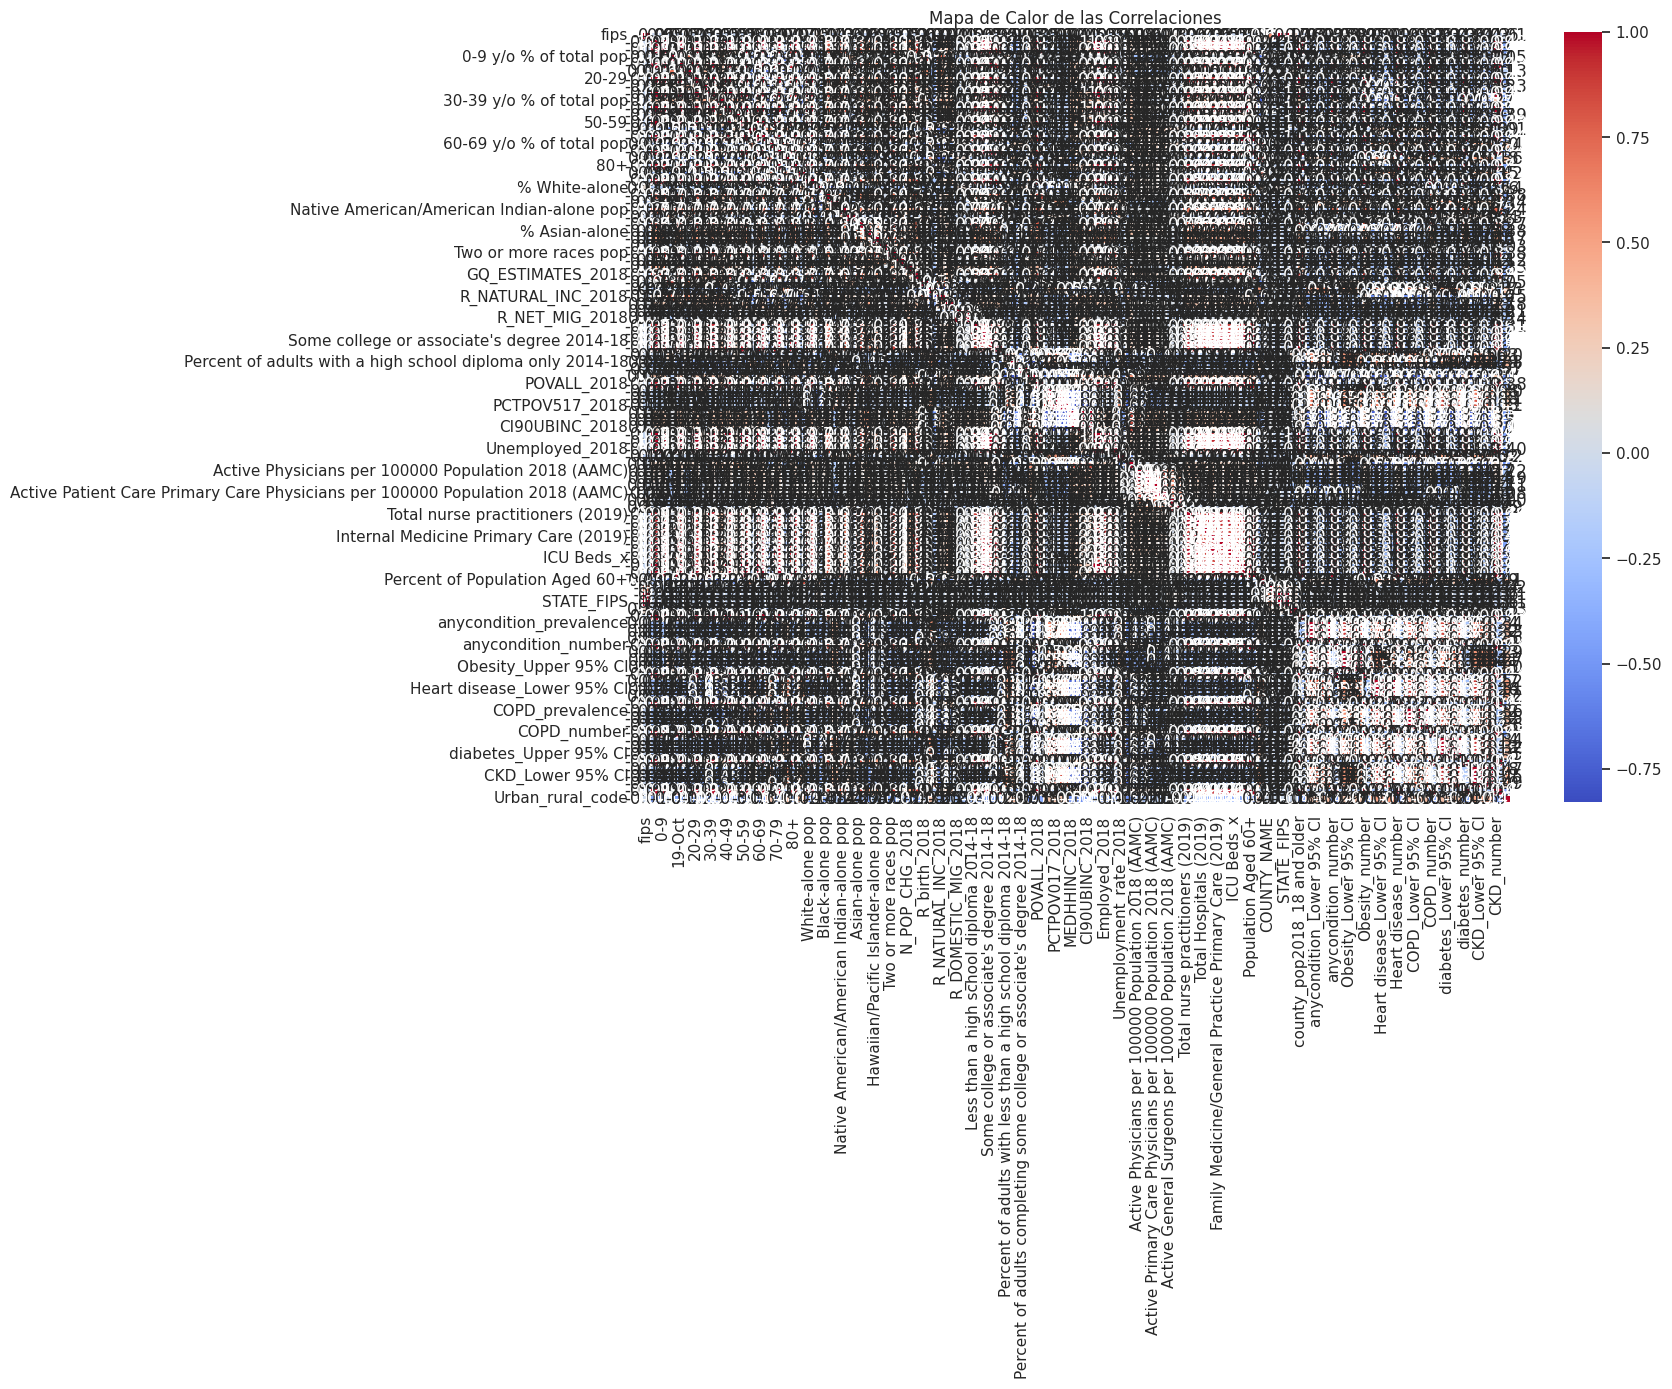

In [28]:

# Identificar las columnas de tipo string (object)
string_cols = total_data.select_dtypes(include=['object']).columns

# Convertir las columnas de tipo string a factores
for col in string_cols:
    total_data[col] = pd.factorize(total_data[col])[0]

# Filtrar solo las columnas numéricas (después de factorizar las columnas de string)
numeric_cols = total_data.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_cols.corr()

# Crear el mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de las Correlaciones')
plt.show()



In [29]:
total_data.describe()

fips       TOT_POP           0-9  0-9 y/o % of total pop  \
count   3140.000000  3.140000e+03  3.140000e+03             3140.000000   
mean   30401.640764  1.041894e+05  1.274030e+04               11.871051   
std    15150.559265  3.335834e+05  4.180730e+04                2.124081   
min     1001.000000  8.800000e+01  0.000000e+00                0.000000   
25%    18180.500000  1.096325e+04  1.280500e+03               10.594639   
50%    29178.000000  2.580050e+04  3.057000e+03               11.802727   
75%    45081.500000  6.791300e+04  8.097000e+03               12.951840   
max    56045.000000  1.010552e+07  1.208253e+06               25.460677   

             19-Oct  10-19 y/o % of total pop         20-29  \
count  3.140000e+03               3140.000000  3.140000e+03   
mean   1.336798e+04                 12.694609  1.446933e+04   
std    4.228439e+04                  1.815044  4.957773e+04   
min    0.000000e+00                  0.000000  0.000000e+00   
25%    1.374500e+03                 11.674504  1.263750e+03   
50%    3.274000e+03                 12.687422  3.108000e+03   
75%    8.822250e+03                 13.659282  8.976250e+03   
max    1.239139e+06                 23.304372  1.557073e+06   

       20-29 y/o % of total pop         30-39  30-39 y/o % of total pop  \
count               3140.000000  3.140000e+03               3140.000000   
mean                  12.283979  1.391649e+04                 11.751535   
std                    3.126297  4.899095e+04                  1.696599   
min                    0.000000  1.100000e+01                  6.092789   
25%                   10.496774  1.232750e+03                 10.689322   
50%                   11.772649  3.000500e+03                 11.580861   
75%                   13.182260  8.314250e+03                 12.639379   
max                   37.570198  1.501844e+06                 22.225129   

              40-49  40-49 y/o % of total pop         50-59  \
count  3.140000e+03               3140.000000  3.140000e+03   
mean   1.288521e+04                 11.556685  1.363803e+04   
std    4.347219e+04                  1.372935  4.272063e+04   
min    4.000000e+00                  2.631579  1.400000e+01   
25%    1.245250e+03                 10.685197  1.483000e+03   
50%    3.048500e+03                 11.618372  3.515500e+03   
75%    8.120500e+03                 12.386083  9.157250e+03   
max    1.350076e+06                 19.430369  1.306003e+06   

       50-59 y/o % of total pop         60-69  60-69 y/o % of total pop  \
count               3140.000000  3.140000e+03               3140.000000   
mean                  13.526733  1.191621e+04                 13.182225   
std                    1.481692  3.451858e+04                  2.532498   
min                    5.316361  2.000000e+01                  3.444403   
25%                   12.738561  1.476500e+03                 11.621232   
50%                   13.621339  3.410000e+03                 13.013409   
75%                   14.429115  8.710500e+03                 14.467254   
max                   20.454545  1.014325e+06                 27.272727   

               70-79  70-79 y/o % of total pop            80+  \
count    3140.000000               3140.000000    3140.000000   
mean     7220.310510                  8.399382    4035.541720   
std     20287.498429                  2.214915   12063.782251   
min         6.000000                  2.199551       0.000000   
25%       950.750000                  7.032275     533.000000   
50%      2177.000000                  8.208162    1160.000000   
75%      5574.000000                  9.445777    2899.750000   
max    572530.000000                 31.327959  356275.000000   

       80+ y/o % of total pop  White-alone pop  % White-alone  \
count             3140.000000     3.140000e+03    3140.000000   
mean                 4.733801     7.965979e+04      84.494109   
std                  1.535028     2.372880e+05      16.348987   
min  

Estas variables pueden proporcionar una visión clara de las relaciones entre los recursos sanitarios y los datos socio demográficos, dado que son indicadores de salud relevantes.
La elección de la variable a predecir puede depender del enfoque que se desee, en este caso se ha seleccionado diabetes_prevalence.

In [46]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Suponiendo que tu dataframe se llama total_data
# Filtrar solo las columnas numéricas
numeric_cols = total_data.select_dtypes(include=['number'])

# Dividir los datos en características (X) y objetivo (y)
X = numeric_cols.drop(columns=['diabetes_prevalence'])  # Usamos 'diabetes_prevalence' como objetivo
y = numeric_cols['diabetes_prevalence']

# Seleccionar las mejores características
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Obtener los nombres de las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos de datos
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



Características seleccionadas: Index(['diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI'],
      dtype='object')
X_train shape: (2512, 5)
X_test shape: (628, 5)
y_train shape: (2512,)
y_test shape: (628,)


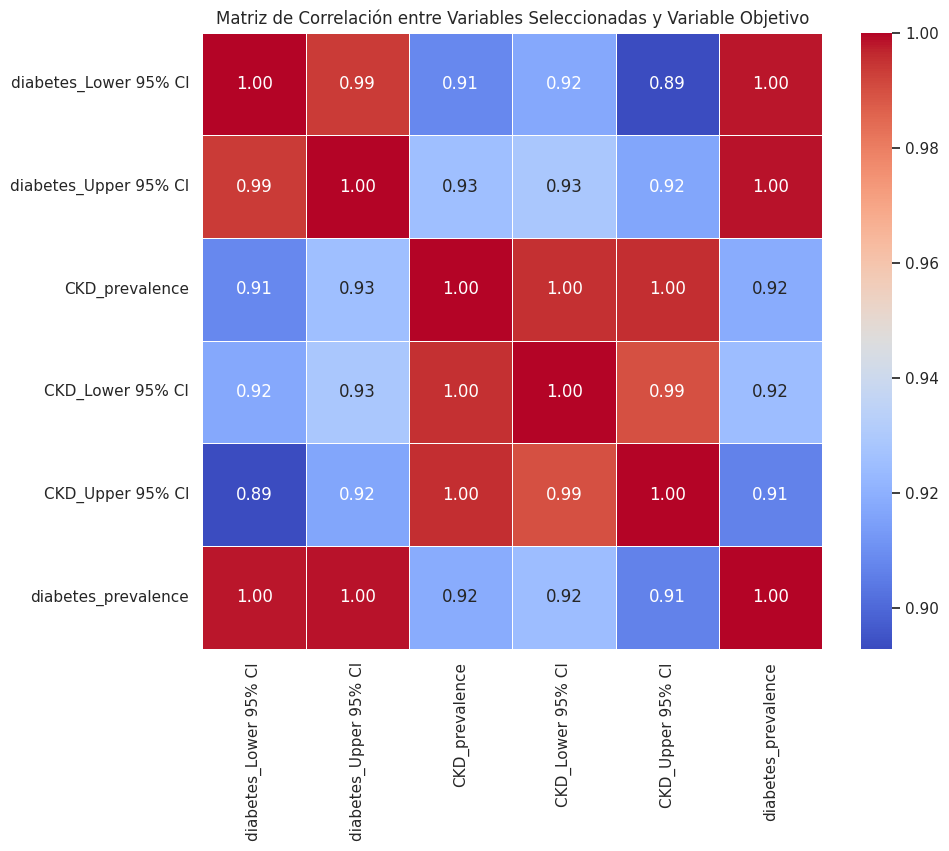

In [60]:
# Incluir la variable objetivo en el DataFrame de las características seleccionadas
selected_data = total_data[selected_features.tolist() + ['diabetes_prevalence']]

# Crear una matriz de correlación
correlation_matrix = selected_data.corr()

# Crear el mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Seleccionadas y Variable Objetivo')
plt.show()


Las altas correlaciones entre estas variables indican que están fuertemente relacionadas entre sí.

La multicolinealidad puede causar problemas en la estimación de los coeficientes del modelo, haciendo que sean inestables e interpretativamente difíciles.

In [48]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar el conjunto de entrenamiento
scaler.fit(X_train)

# Transformar los datos de entrenamiento
X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, columns=selected_features)

# Transformar los datos de prueba
X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, columns=selected_features)

# Mostrar las primeras filas del conjunto de entrenamiento normalizado
print(X_train_norm.head())



   diabetes_Lower 95% CI  diabetes_Upper 95% CI  CKD_prevalence  \
0               0.209312               0.314479        0.644725   
1              -0.060621               0.064137        0.109985   
2              -0.330555              -0.329256       -0.959495   
3              -0.639050              -0.722650       -0.781249   
4              -0.137745              -0.221967       -0.068262   

   CKD_Lower 95% CI  CKD_Upper 95% CI  
0          0.576430          0.657452  
1          0.000382          0.161947  
2         -0.959698         -0.994232  
3         -0.767682         -0.829064  
4          0.000382         -0.168390  


In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_norm, y_train)

LinearRegression()

In [57]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2, b3, b4, b5): {model.coef_}")

Intercepto (a): 13.04164012738854
Coeficientes (b1, b2, b3, b4, b5): [ 1.27644328  1.42255933  0.02215714 -0.01320995 -0.00980383]


In [58]:
y_pred = model.predict(X_test)
y_pred

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53.10013153, 40.68664222, 64.75189124, 41.65303921, 38.3851842 ,
       38.81310167, 44.22448111, 61.55709426, 44.63770336, 37.02000729,
       44.35212544, 57.77636055, 36.2103065 , 52.62001277, 42.86045591,
       49.74961872, 49.18191803, 52.97363892, 58.92464756, 46.63969525,
       51.90784043, 45.82803574, 42.46282566, 55.28855683, 49.32319358,
       41.87786933, 32.71753571, 43.13116318, 42.19300902, 62.44902656,
       68.65647557, 59.72212378, 51.93697797, 48.15854565, 44.08214156,
       55.17701644, 53.13050646, 40.57228646, 45.70145746, 37.30566882,
       58.92464756, 42.15041362, 43.14479441, 47.76232205, 41.90832787,
       53.96994239, 51.00086819, 50.98617092, 58.9245619 , 61.82469314,
       51.794463  , 77.71812903, 41.88008504, 59.30988192, 49.30823932,
       64.90735212, 44.05168302, 42.16378785, 49.22362075, 45.3026755 ,
       37.32028042, 51.04372058, 49.36587464, 40.43109657, 45.79953592,
       41.0976467 , 44.09551579, 47.64903234, 47.49012042, 46.09

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 1290.9304599879142
Coeficiente de determinación: -159.5005683671092


Un R2 negativo es altamente inusual y generalmente indica que el modelo es peor que simplemente usar la media de los datos para predecir el valor objetivo. Esto sugiere que el modelo tiene un rendimiento extremadamente malo y que las predicciones están muy alejadas de los datos reales.

La multicolinealidad hace que los coeficientes del modelo sean inestables y poco fiables, lo que resulta en un rendimiento deficiente del modelo

In [54]:
from sklearn.linear_model import Lasso

# Crear y entrenar el modelo de regresión Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_lasso = lasso_model.predict(X_test)

# Evaluar el modelo
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print('MSE Regresión Lasso:', mse_lasso)
print('R^2 Regresión Lasso:', r2_lasso)


MSE Regresión Lasso: 0.17557707606795916
R^2 Regresión Lasso: 0.9781706130774802


Un R2 de 0.97 después de aplicar regularización es un indicador muy bueno, ya que sugiere que el modelo explica el 97% de la variabilidad de los datos. La regularización ayuda a evitar el sobreajuste penalizando los coeficientes grandes en el modelo, lo que generalmente mejora la capacidad del modelo para generalizar sobre datos no observados.

La regularización ayuda a penalizar los coeficientes grandes y reduce los efectos negativos de la multicolinealidad, mejorando la capacidad del modelo para generalizar sobre los datos.

/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.447e+00, tolerance: 1.823e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  mod

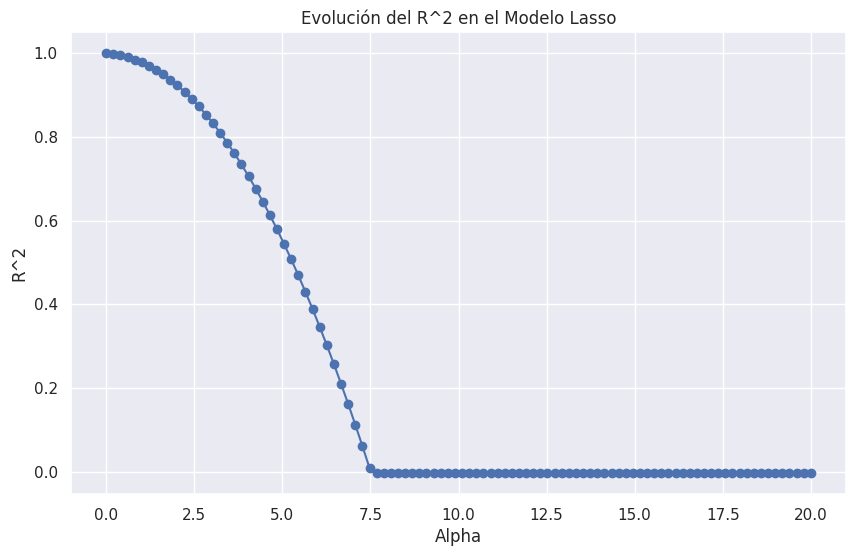

In [55]:
import matplotlib.pyplot as plt

# Lista para almacenar los valores de R^2
r2_values = []

# Valores de alpha a probar
alpha_values = np.linspace(0, 20, 100)

for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    r2_values.append(r2_score(y_test, lasso_model.predict(X_test)))

# Dibuja los valores de R^2 en un diagrama de líneas
plt.figure(figsize=(10,6))
plt.plot(alpha_values, r2_values, marker='o')
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.title('Evolución del R^2 en el Modelo Lasso')
plt.grid(True)
plt.show()


Un 𝑅2 de 1 con alpha = 0 indica un ajuste perfecto, pero también puede sugerir sobreajuste.

A medida que alpha aumenta, 𝑅2 disminuye, mostrando cómo la regularización penaliza los coeficientes grandes y reduce el ajuste.

Sin embargo, si alpha es demasiado alto, la penalización es tan fuerte que los coeficientes se reducen en exceso, lo que hace que el modelo se vuelva subajustado (underfitting).